### Data Preprocessing

### 1) Import the necessary libraries and read the data.

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [234]:
fifa = pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [235]:
fifa.shape

(18207, 60)

In [236]:
fifa.select_dtypes('object').shape

(18207, 18)

In [237]:
fifa.select_dtypes(np.number).shape

(18207, 42)

### 2) Drop any columns that you deem unecessary for analysis.

In [238]:
# Unncessary columns are: 'Club Logo', 'Flag'. Hence dropping them.

fifa.drop(['Club Logo','Flag'],axis=1,inplace=True)

In [239]:
fifa.shape

(18207, 58)

### 3) The following columns need to be converted for further analysis

In [241]:
############# Value-column

fifa['Value'].value_counts()

€1.1M     431
€375K     372
€425K     354
€325K     351
€450K     343
         ... 
€81M        1
€61M        1
€40M        1
€72M        1
€56.5M      1
Name: Value, Length: 217, dtype: int64

In [242]:
fifa['Value'] = fifa['Value'].str.replace('€','')
fifa['Value'] = fifa['Value'].str.replace('K','-1000')
fifa['Value'] = fifa['Value'].str.replace('M','-1000000')

s=fifa['Value'].str.split('-',expand=True).astype('float')
fifa['Value']=s[0]*s[1]

In [243]:
fifa['Value'].dtype

dtype('float64')

In [244]:
fifa['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [245]:
############   Wage -column

fifa['Wage'] = fifa['Wage'].str.replace('€','')
fifa['Wage'] = fifa['Wage'].str.replace('K','-1000')
fifa['Wage'] = fifa['Wage'].str.replace('M','-1000000')

s2 = fifa['Wage'].str.split('-',expand=True).astype(float)
fifa['Wage'] = s2[0]*s2[1]

In [246]:
fifa['Wage'].dtype

dtype('float64')

In [247]:
######### Joined-column

fifa['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [248]:
fifa['Joined'] = pd.to_datetime(fifa['Joined']).dt.year
fifa['Joined'] = fifa['Joined'].fillna(fifa['Joined'].mean())
fifa['Joined'] = fifa['Joined'].astype('int')

In [249]:
fifa['Joined'].dtype

dtype('int32')

In [250]:
fifa['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

In [251]:
######## Contract Valid Until-column

In [252]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [253]:
fifa['Contract Valid Until'].dtype

dtype('<M8[ns]')

In [254]:
########### Height column

fifa['Height'] = fifa['Height'].str.replace("'",'.').astype('float')

In [255]:
fifa['Height'].dtype

dtype('float64')

In [256]:
########## Weight column

fifa['Weight'] = fifa['Weight'].str.replace('lbs','').astype('float')

In [257]:
fifa['Weight'].dtype

dtype('float64')

In [258]:
########### Release clause column

fifa['Release Clause'] = fifa['Release Clause'].str.replace('€','')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('M','-1000000')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('K','-1000')

In [259]:
fifa['Release Clause']

0        226.5-1000000
1        127.1-1000000
2        228.1-1000000
3        138.6-1000000
4        196.4-1000000
             ...      
18202         143-1000
18203         113-1000
18204         165-1000
18205         143-1000
18206         165-1000
Name: Release Clause, Length: 18207, dtype: object

In [260]:
s4 = fifa['Release Clause'].str.split('-',expand=True).astype('float')
fifa['Release Clause'] =s4[0]*s4[1]

In [261]:
fifa['Release Clause'].dtype

dtype('float64')

In [262]:
fifa.shape

(18207, 58)

### 4) Check for missing values and do a mean imputation where necessary

In [263]:
#### null values

fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                         252
Wage                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve         

In [264]:
# There are many null values. So, imputing the null values with mean for numerical columns.

num_cols = fifa.select_dtypes(np.number)

for col in num_cols.columns:
    fifa[col] = fifa[col].fillna(fifa[col].mean())


In [265]:
nv = pd.DataFrame(fifa.isnull().sum(),columns=['nulls'])
nv['%nulls'] = (nv['nulls']/(fifa.shape[0]))*100
nv.sort_values(by='nulls',ascending=False)

,nulls,%nulls
Loaned From,16943,93.057615
Contract Valid Until,289,1.587302
Club,241,1.323667
Position,60,0.329544
Preferred Foot,48,0.263635
Work Rate,48,0.263635
Body Type,48,0.263635
Balance,0,0.000000
ShotPower,0,0.000000
Jumping,0,0.000000


In [266]:
# Loaned from column has 93% of null values. So, dropping that column.

fifa = fifa.drop(['Loaned From'],axis=1)

In [271]:
# Prefereed Foot, Work Rate, Body Type, Position, Contract Valid Until, Club columns have null values less than  2%. 
# So, imputing the null values with mode would bee difficult as there are many modes for some columns. So, using ffill for imputing.

fifa = fifa.sample(frac=1)
cols = ['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Contract Valid Until', 'Club']
for col in cols:
    fifa[col]=fifa[col].fillna(method='ffill')

In [274]:
fifa.isnull().sum().sum()

0

### Exploratory Analysis

### 1) Plot the distribution of Overall rating for all players. 

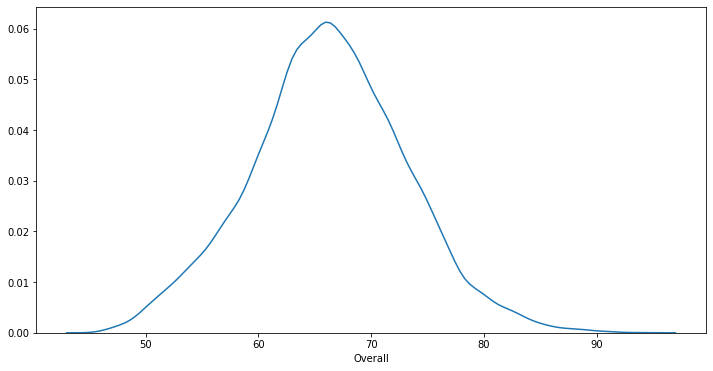

In [275]:
plt.figure(figsize=(12,6))
sns.distplot(fifa['Overall'],hist=False)
plt.show()

In [276]:
fifa['Overall'].skew()

0.06718492227833817

### 2). Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

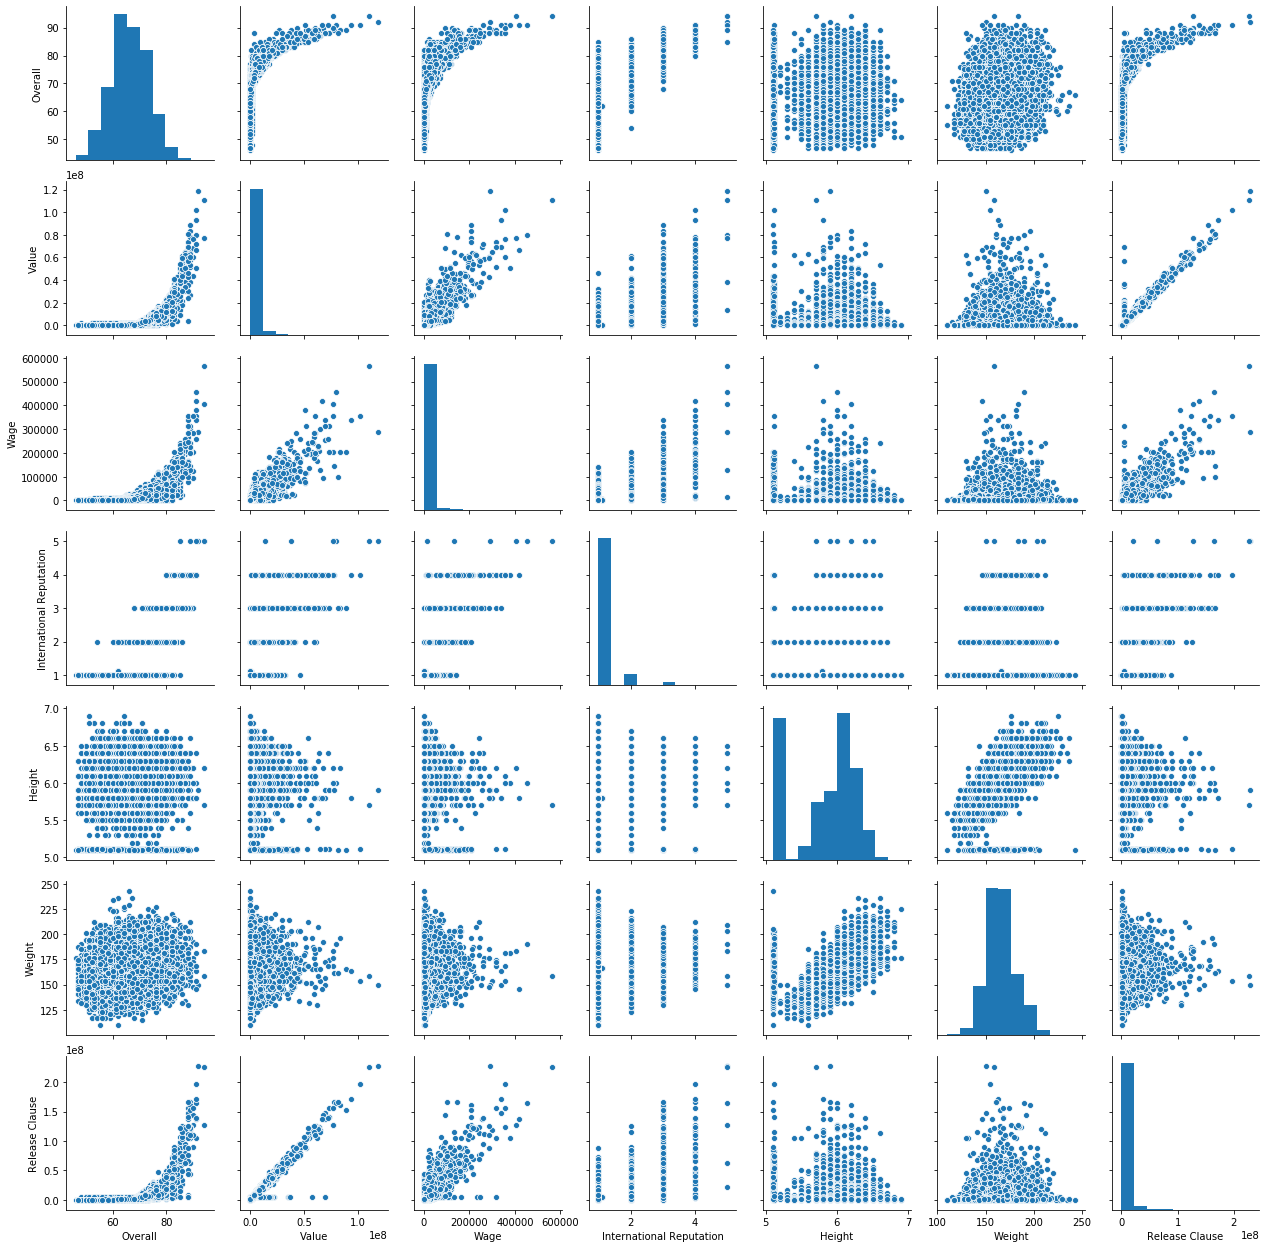

In [277]:
sns.pairplot(fifa[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])
plt.show()

### 3). Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [310]:
df_20 = fifa[fifa['Contract Valid Until'].dt.year==2020].sort_values(by='Overall',ascending=False).head(20)
df_20

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,72000000.0,260000.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,91,91,Chelsea,93000000.0,340000.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,91,91,Real Madrid,51000000.0,380000.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,91,91,Real Madrid,67000000.0,420000.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,90,90,Manchester City,60000000.0,285000.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,89,89,Juventus,27000000.0,215000.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
52,171877,M. Hamšík,30,https://cdn.sofifa.org/players/4/19/171877.png,Slovakia,87,87,Napoli,46500000.0,125000.0,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,79100000.0


#### a) What would the average wage for this set of players be?

In [312]:
df_20['Wage'].mean()

206650.0

#### b) What is the average age?

In [313]:
df_20['Age'].mean()

30.15

#### c) Is there a correlation between the Overall rating and Value for these players?

In [314]:
df_20['Overall'].corr(df_20['Value'])

0.7011853036244428

### 4). Generate tables containing the top 5 players by Overall rating for each unique position.

In [320]:
data_5=fifa.groupby(by="Position")

mylist=[]
for name,values in data_5:
    mylist.append(name)
mylist

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [327]:
d1=pd.DataFrame()

for i in mylist:
    top5 = data_5.get_group(i).sort_values(by=['Overall'],ascending=False).head(5)
    d1=pd.concat([d1,top5],axis=0)

In [328]:
d1

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,89,90,Atlético Madrid,78000000.0,145000.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,86,86,Arsenal,43500000.0,190000.0,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,86,86,FC Bayern München,45000000.0,135000.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,86,87,Liverpool,53000000.0,195000.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,77000000.0,405000.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,90,90,FC Bayern München,77000000.0,205000.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,89,89,Manchester City,64500000.0,300000.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,89,91,Tottenham Hotspur,83500000.0,205000.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0


#### a). Are there any players appearing in more than one Table. Please point out such players.

In [331]:
d1['Name'].duplicated().sum()

0

#### b). What is the average wage one can expect to pay for the top 5 in every position?

In [333]:
d1.groupby(d1['Position']).mean()['Wage']

Position
CAM    174000.0
CB     151200.0
CDM    217000.0
CF      47400.0
CM     124800.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    203000.0
LDM    138000.0
LF     123200.0
LM     164600.0
LS     130600.0
LW     261000.0
LWB     34200.0
RAM     46600.0
RB     155400.0
RCB    229000.0
RCM    235600.0
RDM    105000.0
RF     148000.0
RM     139000.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64